In [110]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from gensim.models import Word2Vec
from processing.processing import PreProcessing
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [111]:
old_data = PreProcessing.read_davidson_data("data/Davidson&al.csv")

data = old_data
data.tweet = data.tweet.apply(PreProcessing.sanitize_tweet)
ol = data[data["class"] == "offensive language"][:6000] # Only get 6000 samples for offensive language otherwise the model will tend to classify hate speech as offensive language which is a little different.
data = data[data["class"] != "offensive language"].append(ol)

In [112]:
clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 3))), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier()),])
clf = clf.fit(data["tweet"], data["class"])

In [113]:
docs_new = ["Hey, panini head! Are you listening?", "You're an idiot sandwich", "Fuck off you fat useless sack of fucking yankee dankee doodle shite", "You surprise me as to how bad you are", "Fuck off! Fuck off! Fuck off! Fuck off!", "You guys cook like old people.", "There’s enough garlic in here to kill every vampire in Europe.", "This soufflé has sunk so badly James Cameron wants to make a film about it.", "He cant's count to fucking two!", "You deserve a kick in the nuts", "You look like you're just about to lose your virginity.", "You're a fucking disgrace"]
docs_new_sanitized = [PreProcessing.sanitize_tweet(s) for s in docs_new]
predicted = clf.predict(docs_new_sanitized)
for x,y in zip(docs_new, predicted):
    print(x, "->", y)

Hey, panini head! Are you listening? -> offensive language
You're an idiot sandwich -> normal
Fuck off you fat useless sack of fucking yankee dankee doodle shite -> offensive language
You surprise me as to how bad you are -> normal
Fuck off! Fuck off! Fuck off! Fuck off! -> offensive language
You guys cook like old people. -> normal
There’s enough garlic in here to kill every vampire in Europe. -> normal
This soufflé has sunk so badly James Cameron wants to make a film about it. -> normal
He cant's count to fucking two! -> hate speech
You deserve a kick in the nuts -> normal
You look like you're just about to lose your virginity. -> normal
You're a fucking disgrace -> offensive language


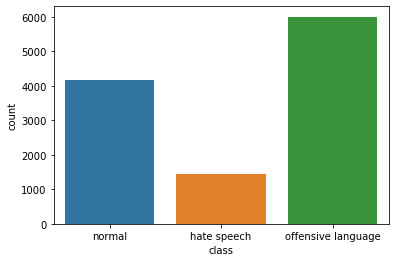

In [114]:
sns.countplot(x="class", data=data)

In [115]:
print(metrics.classification_report(data["class"], clf.predict(data["tweet"])))

precision    recall  f1-score   support

       hate speech       0.97      0.81      0.88      1430
            normal       0.98      0.99      0.98      4163
offensive language       0.96      0.98      0.97      6000

          accuracy                           0.97     11593
         macro avg       0.97      0.93      0.95     11593
      weighted avg       0.97      0.97      0.96     11593



In [116]:
print(metrics.classification_report(old_data["class"], clf.predict(old_data["tweet"])))

precision    recall  f1-score   support

       hate speech       0.75      0.81      0.78      1430
            normal       0.86      0.99      0.92      4163
offensive language       0.99      0.95      0.97     19190

          accuracy                           0.95     24783
         macro avg       0.86      0.92      0.89     24783
      weighted avg       0.95      0.95      0.95     24783



In [137]:
model = Word2Vec([s.split() for s in old_data.tweet.tolist()])

In [138]:
len(model.wv.vocab)

3527